<b>Image classification project</b>

I m using cifar10 datasets that contain 60,000 images

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(a, b), (c,d) = datasets.cifar10.load_data()
X_train = a[0:2000]
y_train = b[0:2000]
X_test  = c[2000:4000]
y_test  = d[2000:4000]

X_train.shape

(2000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train =y_train.reshape(-1,)

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test.reshape(-1)

array([1, 5, 4, ..., 2, 2, 9])

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

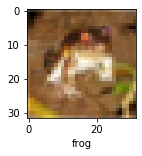

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
2000/2000 [==============================] - 32s 16ms/sample - loss: 2.2311 - acc: 0.1690
Epoch 2/5
2000/2000 [==============================] - 29s 15ms/sample - loss: 2.0762 - acc: 0.2450
Epoch 3/5
2000/2000 [==============================] - 29s 15ms/sample - loss: 1.9554 - acc: 0.2940
Epoch 4/5
2000/2000 [==============================] - 28s 14ms/sample - loss: 1.8961 - acc: 0.3195
Epoch 5/5
2000/2000 [==============================] - 28s 14ms/sample - loss: 1.8374 - acc: 0.3505


In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 2.1761 - acc: 0.1790
Epoch 2/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.8838 - acc: 0.3155
Epoch 3/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.7182 - acc: 0.3760
Epoch 4/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.5850 - acc: 0.4280
Epoch 5/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.4854 - acc: 0.4655
Epoch 6/10
2000/2000 [==============================] - 9s 4ms/sample - loss: 1.3950 - acc: 0.5015
Epoch 7/10
2000/2000 [==============================] - 9s 4ms/sample - loss: 1.3183 - acc: 0.5385
Epoch 8/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.2310 - acc: 0.5650
Epoch 9/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.1599 - acc: 0.6090
Epoch 10/10
2000/2000 [==============================] - 9s 5ms/sample - loss: 1.0649 - acc: 0.6320


In [21]:
cnn.evaluate(X_test,y_test)

2000/2000 [==============================] - 3s 2ms/sample - loss: 1.5227 - acc: 0.4830


[1.522663109779358, 0.483]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.1730978e-03, 1.4396077e-01, 4.3812706e-03, 9.3932524e-02,
        2.1532156e-02, 5.4579224e-02, 3.1027594e-01, 7.4007348e-03,
        2.6404646e-03, 3.6012381e-01],
       [7.4738683e-04, 2.1878774e-04, 9.9832872e-03, 4.6362868e-01,
        1.0344009e-01, 2.8457174e-01, 9.7750708e-02, 3.7561599e-02,
        4.3922046e-04, 1.6585748e-03],
       [2.4155800e-01, 6.8140603e-03, 2.2320794e-01, 4.3792665e-02,
        1.8716079e-01, 1.7312331e-01, 6.5366365e-04, 2.0573689e-02,
        9.9637255e-02, 3.4786307e-03],
       [1.7231848e-03, 2.1732426e-03, 1.2790428e-02, 1.9525544e-01,
        1.8918025e-01, 4.2924055e-01, 9.5658779e-02, 5.2810304e-02,
        1.2222253e-02, 8.9454921e-03],
       [1.4106540e-03, 2.9510909e-04, 3.8113873e-04, 1.1357365e-01,
        3.0380264e-02, 8.3232206e-01, 9.3182093e-03, 3.3653311e-03,
        2.4246485e-03, 6.5288912e-03]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 3, 0, 5, 5]

TypeError: only integer scalar arrays can be converted to a scalar index

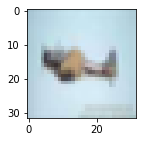

In [36]:
plot_sample(X_test, y_test,41)

In [35]:
classes[y_classes[41]]

'airplane'

In [25]:
classes[y_classes[3]]

'dog'